# PROBLEMA 2

**Resolver a Lei Fundamental da Dinâmica (LFD) no caso de um objeto de massa m = 1,0kg, submetido às forças peso e de arraste (proporcional à velocidade), num problema de dimensão 1. Consideremos o coeficiente é: α = 1,0 N/(m/s). Condição inicial: v(t₀) = v₀. Intervalo de tempo considerado: t ∈ [t₀, t₁] com t₀ = 0s, t₁ = 5,0s, e g = 9,8m/s²**

A LFD conduz à seguinte equação:

$$m\frac{dv}{dt}(t) = mg - \alpha v(t)$$

A implementação do MDF conduz a uma relação iterativa que permite calcular a velocidade em função do tempo em pontos discretos do intervalo [t₀, t₁]:

$$v_{j+1} = \left(1 - \frac{\alpha}{m}\delta t\right)v_j + g\delta t$$


In [ ]:
using Plots, Printf
gr() # Define GR backend para melhor compatibilidade

# Parâmetros do problema
m = 1.0      # massa (kg)
α = 1.0      # coeficiente de arraste (N/(m/s))
g = 9.8      # aceleração da gravidade (m/s²)
t₀ = 0.0     # tempo inicial (s)
t₁ = 5.0     # tempo final (s)
v₀ = 0.0     # velocidade inicial (m/s)


0.0

In [2]:
# Implementação do Método das Diferenças Finitas (MDF)
function solve_velocity_mdf(dt, t₀, t₁, v₀, m, α, g)
    # Número de pontos
    n_points = Int((t₁ - t₀) / dt) + 1
    
    # Vetores para armazenar os resultados
    t = range(t₀, t₁, length=n_points)
    v = zeros(n_points)
    
    # Condição inicial
    v[1] = v₀
    
    # Coeficientes da relação iterativa
    coeff_v = 1 - (α / m) * dt
    coeff_g = g * dt
    
    # Iteração do MDF
    for j in 1:(n_points-1)
        v[j + 1] = coeff_v * v[j] + coeff_g
    end
    
    return t, v
end

# Teste com diferentes passos de tempo
dt_values = [0.1, 0.05, 0.01]

results = Dict()
for dt in dt_values
    t, v = solve_velocity_mdf(dt, t₀, t₁, v₀, m, α, g)
    results[dt] = (t, v)
    println("MDF com dt = $(dt)s: $(length(t)) pontos calculados")
end

println("\nMétodo das Diferenças Finitas implementado com sucesso!")


MDF com dt = 0.1s: 51 pontos calculados
MDF com dt = 0.05s: 101 pontos calculados
MDF com dt = 0.01s: 501 pontos calculados

Método das Diferenças Finitas implementado com sucesso!


In [ ]:
# Solução analítica da equação diferencial
function analytical_solution(t, v₀, m, α, g)
    terminal_velocity = m * g / α
    exponential_term = exp.(-α * t / m)
    
    v_analytical = terminal_velocity * (1 .- exponential_term) .+ v₀ * exponential_term
    
    return v_analytical
end

# Calcular velocidade limite
v_terminal = m * g / α
println("Velocidade limite (terminal): $(round(v_terminal, digits=2)) m/s")

# Calcular solução analítica para comparação
t_analytical = range(t₀, t₁, length=1000)
v_analytical = analytical_solution(t_analytical, v₀, m, α, g)

println("\nSolução analítica calculada para $(length(t_analytical)) pontos")
println("Velocidade final analítica (t = $(t₁)s): $(round(v_analytical[end], digits=4)) m/s")
println("Diferença da velocidade terminal: $(round(abs(v_terminal - v_analytical[end]), digits=4)) m/s")


Velocidade limite (terminal): 9.8 m/s

Solução analítica calculada para 1000 pontos
Velocidade final analítica (t = 5.0s): 9.734 m/s
Diferença da velocidade terminal: 0.066 m/s


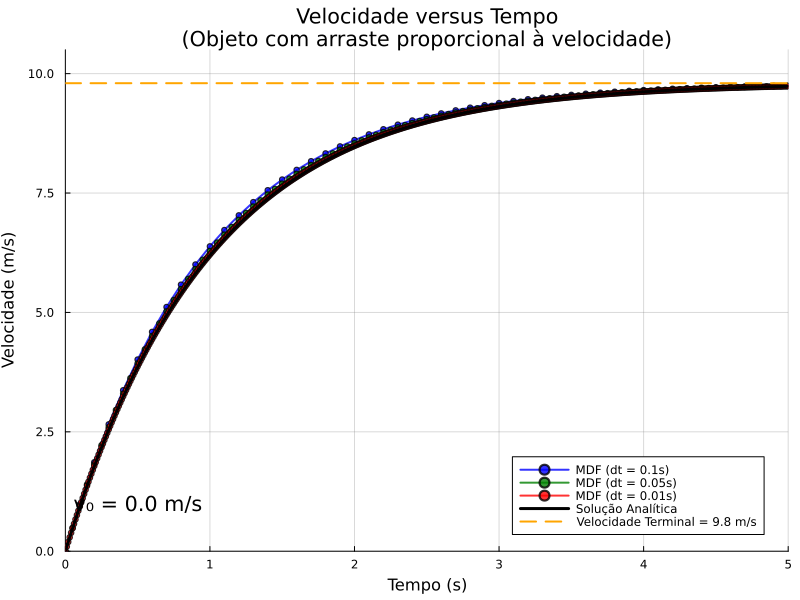

Gráfico da velocidade versus tempo criado com sucesso!


In [5]:
# Criação do gráfico: Velocidade versus tempo
p = plot(size=(800, 600), dpi=100)

# Plotar soluções numéricas (MDF) com diferentes passos de tempo
colors = [:blue, :green, :red]
for (i, dt) in enumerate(dt_values)
    t_num, v_num = results[dt]
    plot!(p, t_num, v_num, 
          marker=:circle, markersize=3, linewidth=2,
          color=colors[i], label="MDF (dt = $(dt)s)", alpha=0.8)
end

# Plotar solução analítica
plot!(p, t_analytical, v_analytical, 
      linewidth=3, color=:black, label="Solução Analítica")

# Linha da velocidade terminal
hline!(p, [v_terminal], 
       linestyle=:dash, linewidth=2, color=:orange,
       label="Velocidade Terminal = $(round(v_terminal, digits=1)) m/s")

# Configurações do gráfico
xlabel!(p, "Tempo (s)")
ylabel!(p, "Velocidade (m/s)")
title!(p, "Velocidade versus Tempo\n(Objeto com arraste proporcional à velocidade)")
plot!(p, grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3)
xlims!(p, (0, 5))
ylims!(p, (0, 10.5))

# Adicionar anotação para velocidade inicial
annotate!(p, [(0.5, 1, "v₀ = $(v₀) m/s")])

display(p)

println("Gráfico da velocidade versus tempo criado com sucesso!")


In [6]:
# Análise de erro e comparação entre métodos
println("="^60)
println("ANÁLISE COMPARATIVA DOS RESULTADOS")
println("="^60)

# Comparar com a solução analítica no tempo final
t_final = t₁
v_analytical_final = analytical_solution([t_final], v₀, m, α, g)[1]

println("\nVelocidade no tempo final (t = $(t_final)s):")
println("Solução Analítica: $(round(v_analytical_final, digits=6)) m/s")

for dt in dt_values
    t_num, v_num = results[dt]
    v_numerical_final = v_num[end]
    error_abs = abs(v_numerical_final - v_analytical_final)
    error_rel = (error_abs / v_analytical_final) * 100
    
    println("MDF (dt = $(dt)s): $(round(v_numerical_final, digits=6)) m/s | Erro: $(round(error_abs, digits=6)) m/s ($(round(error_rel, digits=4))%)")
end

# Análise da convergência para a velocidade terminal
println("\nVelocidade Terminal Teórica: $(round(v_terminal, digits=6)) m/s")
diff_percent = ((v_terminal - v_analytical_final)/v_terminal)*100
println("Aproximação da solução analítica (t = $(t_final)s): $(round(diff_percent, digits=4))% de diferença")

# Tempo para atingir 95% da velocidade terminal
v_95_percent = 0.95 * v_terminal
# Resolver: v_95_percent = v_terminal * (1 - e^(-α*t/m))
# e^(-α*t/m) = 1 - v_95_percent/v_terminal
# t = -(m/α) * ln(1 - v_95_percent/v_terminal)
t_95_percent = -(m/α) * log(1 - v_95_percent/v_terminal)

println("\nTempo para atingir 95% da velocidade terminal:")
println("t₉₅% = $(round(t_95_percent, digits=3)) s")
println("v(t₉₅%) = $(round(v_95_percent, digits=3)) m/s")


ANÁLISE COMPARATIVA DOS RESULTADOS

Velocidade no tempo final (t = 5.0s):
Solução Analítica: 9.733968 m/s
MDF (dt = 0.1s): 9.749493 m/s | Erro: 0.015525 m/s (0.1595%)
MDF (dt = 0.05s): 9.741979 m/s | Erro: 0.008011 m/s (0.0823%)
MDF (dt = 0.01s): 9.735609 m/s | Erro: 0.001641 m/s (0.0169%)

Velocidade Terminal Teórica: 9.8 m/s
Aproximação da solução analítica (t = 5.0s): 0.6738% de diferença

Tempo para atingir 95% da velocidade terminal:
t₉₅% = 2.996 s
v(t₉₅%) = 9.31 m/s


## Resultados e Conclusões

### Equação Diferencial Resolvida

A equação fundamental da dinâmica para este problema é:

$$m\frac{dv}{dt} = mg - \alpha v$$

### Solução Analítica

A resolução analítica desta equação diferencial de primeira ordem conduz à expressão:

$$v(t) = \frac{mg}{\alpha}\left(1 - e^{-\frac{\alpha t}{m}}\right) + v_0 e^{-\frac{\alpha t}{m}}$$

### Velocidade Terminal

A velocidade limite (terminal) é obtida quando $\frac{dv}{dt} = 0$:

$$v_{limite} = \frac{mg}{\alpha} = \frac{1.0 \times 9.8}{1.0} = 9.8 \text{ m/s}$$

### Observações

1. **Efeito da força de arraste**: A força de arraste proporcional à velocidade ($F_{arraste} = \alpha v$) compensa gradualmente a força peso, levando o objeto a uma velocidade limite.

2. **Convergência**: O objeto aproxima-se assintoticamente da velocidade terminal, nunca a atingindo completamente em tempo finito.

3. **Precisão numérica**: O método das diferenças finitas (MDF) apresenta boa concordância com a solução analítica, especialmente para passos de tempo menores.

4. **Estabilidade**: A relação iterativa é estável para os valores de $\delta t$ utilizados, mantendo a convergência para a solução correta.
